# Introduction to Deep Learning, HW 1
This document gives a suggested outline for the coding assignment.  Please see the assignment pdf for a more complete description of the assignment.

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Junyang Gao

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

/Users/junyang/anaconda2/envs/p3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Problem 2: Algorithmic Implementation of a Multi-Class Logistic Regression without Tensorflow (30 Points)

Succintly, for this problem we have an input image that we have vectorized to have $p=784$ features, and the output space is $C=10$ dimensional.  To get the full details on logistic regression, please visit the example codes and and the lectures.  Succinctly, the multiclass logistic regression model is as follows:

$$\mathbf{\gamma}=\mathbf{W}\mathbf{x}+\mathbf{b},\quad \mathbf{W}\in\mathbb{R}^{C\times p},\quad \mathbf{b}\in\mathbb{R}^{C}$$
$$ p(y=j)=\text{softmax}(\mathbf{\gamma})_j$$
$$\ell(y,\gamma)=\sum_{j=1}^C1_{(y=j)}\log(\text{softmax}(\mathbf{\gamma})_j)$$
or, if $\mathbf{r}$ is a one-hot encoding of $y$, then
$$\ell(r,\gamma)=\mathbf{r}\cdot \log(\text{softmax}(\mathbf{\gamma}))$$
We want to implement this model in more basic codes and learn it to build a better understanding of what's going on before moving to using deep learning toolkits.

In is permissable in the context of this problem to use the MNIST dataset and minibatcher from Tensorflow, which should reduce the amount of bespoke coding that you have to do.

Note that this function is depreciated, but it will work for now.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Visualizing the data to make sure that its understood:

In [ ]:
# Dataset statistics# Datas 
print('Training image data: ', mnist.train.images.shape)
print('Testing image data: ', mnist.test.images.shape)
print('28 x 28 = ', 28*28)
print(mnist.train.images[0].shape)

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[1,:]))
image = np.reshape(mnist.train.images[1,:],[28,28])
plt.imshow(image, cmap='gray')

You can pull a new data example from MNIST by the following:

Note that the digit will change each time you run this because it is randomly sampling.

In [ ]:
current_data=mnist.train.next_batch(1)
print(current_data[0].shape)
# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(current_data[1]))
image = np.reshape(current_data[0],[28,28])
plt.imshow(image, cmap='gray')

In [ ]:
current_data=mnist.train.next_batch(100)
#print(current_data[0][0].reshape(784,1))
print(len(current_data))
print(current_data[0].shape)
print(current_data[1].shape)

Below are the functions that you need to define to make this work.

In [3]:
def lr_gradient(current_parameters,data_minibatch):
    
    X = data_minibatch[0].T
    Y = data_minibatch[1].T
    
    #minibatch size
    m = X.shape[1]
    
    W = current_parameters['W']
    b = current_parameters['b']
    A = np.dot(W.T, X) + b
    
    exp = np.exp(A)
    softmax = exp / np.sum(exp, axis=0, keepdims=True)
    
    loss = - np.sum(Y * np.log(softmax)) / m
    
    W_grad = np.dot(X, (softmax - Y).T) / m
    b_grad = np.sum((softmax - Y)) / m
    return W_grad, b_grad, loss

In [4]:
def lr_loss(current_parameters,data_minibatch):
    # calculate the loss
    X = data_minibatch[0].T
    Y = data_minibatch[1].T
    
    #minibatch size
    m = X.shape[1]
    
    W = current_parameters['W']
    b = current_parameters['b']
    A = np.dot(W.T, X) + b
    
    exp = np.exp(A)
    softmax = exp / np.sum(exp, axis=0, keepdims=True)
    
    avg_loss = - np.sum(Y * np.log(softmax)) / m
    return avg_loss

Run the stochastic gradient descent optimization loop.  Note that you need to fill in the values to make this work well.

In [5]:
max_iterations=5000 # choose the max number of iterations
step_size=0.009 # choose your step size
W= np.zeros((784,10)) # choose your starting parameters (connection weights)
b= np.zeros((10,1)) # choose your starting parameters (biases)
training_loss_history=[]
validation_loss_history=[]
current_parameters = {
    'W': W,
    'b': b
}
for iter in range(0,max_iterations):
    current_data=mnist.train.next_batch(64)
    
    # note you need to change this to your preferred data format.
    W_grad,b_grad, loss =lr_gradient(current_parameters,current_data)
    
    W=W-step_size*W_grad
    b=b-step_size*b_grad
    current_parameters['W'] = W
    current_parameters['b'] = b
    
    # record loss every 100 iterations
    if iter % 100 == 0:
        training_loss_history.append(loss)
        validation_batch = (mnist.validation.images, mnist.validation.labels)
        validation_loss_history.append(lr_loss(current_parameters,validation_batch))

It can be a helpful diagnostic tool to visualize the learning curve:

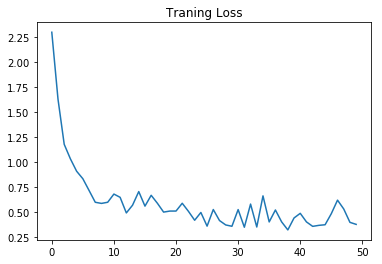

In [6]:
plt.title('Traning Loss')
plt.plot(training_loss_history)

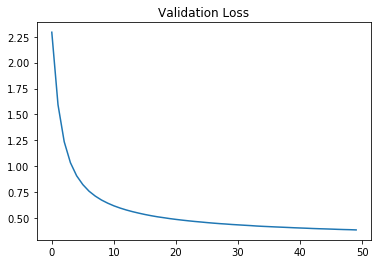

In [7]:
plt.title('Validation Loss')
plt.plot(validation_loss_history)

In [8]:
def predict(current_parameters, X):
    X = X.T
    m = X.shape[1]
    Y_prediction = np.zeros((10,m))
    
    W = current_parameters['W']
    b = current_parameters['b']
#     print(b.shape)
    
    A = np.dot(W.T, X) + b
    exp = np.exp(A)
    softmax = exp / np.sum(exp, axis=0, keepdims=True)
    
    max_idx = np.argmax(softmax, axis=0)
    
    Y_prediction[max_idx, np.arange(m)] = 1
    
    return Y_prediction

In [ ]:
current_data=mnist.train.next_batch(1)
print('\nTrain image 1 is labelled one-hot as {0}'.format(current_data[1]))
image = np.reshape(current_data[0],[28,28])
plt.imshow(image, cmap='gray')
print(predict(current_parameters, current_data[0]))

Calculate both your training loss and accuracy and your validation loss and accuracy

In [9]:
# Fill in code here.
#training accuracy
X = mnist.train.images
Y = mnist.train.labels
Y_predictions = predict(current_parameters, X)
accuracy = 1 - ((np.sum(np.abs(Y.T - Y_predictions))/ 2) / Y.shape[0])
print('training loss:', training_loss_history[-1])
print('training accuracy:', accuracy)

#validation accuracy
X = mnist.validation.images
Y = mnist.validation.labels
Y_predictions = predict(current_parameters, X)
accuracy = 1 - ((np.sum(np.abs(Y.T - Y_predictions))/ 2) / Y.shape[0])
print('validation loss:', validation_loss_history[-1])
print('validation accuracy:', accuracy)

#test accuracy
X = mnist.test.images
Y = mnist.test.labels
Y_predictions = predict(current_parameters, X)
accuracy = 1 - ((np.sum(np.abs(Y.T - Y_predictions))/ 2) / Y.shape[0])
print('test accuracy:', accuracy)

training loss: 0.3789095278714887
training accuracy: 0.891
validation loss: 0.38722179805963713
validation accuracy: 0.8976
test accuracy: 0.8978


## Problem 3: Algorithmic Implementation of a Multi-Class Logistic Regression with Tensorflow (30 Points)
As above, but now you are allowed to use tensorflow to perform model learning.

### (a)	Set up a logistic regression network, and learn it on MNIST using stochastic gradient descent.

In [10]:
# Modeling Definition
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001, iterations=2000):
    
    loss = []
    validation_acc = []
    
    tf.reset_default_graph()   
    
    #create placeholder
    X = tf.placeholder(tf.float32, [784, None], name="X")
    Y = tf.placeholder(tf.float32, [10, None], name="Y")
    
    #create variable
    W = tf.get_variable("W", [10, 784], initializer = tf.zeros_initializer())
    b = tf.get_variable("b", [10, 1], initializer = tf.zeros_initializer())
    
    params = {
        'W':W,
        'b':b
    }
    #forward
    A = tf.add(tf.matmul(W, X), b)
    
    #loss
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(A), labels=tf.transpose(Y)))
    
    #back
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(A), tf.argmax(Y))

    # Calculate accuracy 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        # print('hahaha')
        for i in range(iterations):
            minibatch = mnist.train.next_batch(64)
            (minibatch_X, minibatch_Y) = minibatch
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})
            
            
            # report every 100 iteration
            if i % 100 == 0:
                loss.append(minibatch_cost)
                # validate
                validation_batch = (mnist.validation.images, mnist.validation.labels)
                validation_acc.append(accuracy.eval({X: validation_batch[0].T, Y: validation_batch[1].T}))
                print ("after iteration {}: training loss: {} ; validation accuracy: {}".format(\
                        i, minibatch_cost, validation_acc[-1]))
        plt.subplot(1,2,1)
        plt.title('Training Loss')
        plt.plot(loss)
        plt.subplot(1,2,2)
        plt.title('Validation Accuracy')
        plt.plot(validation_acc)
        
        print("Train Accuracy:", accuracy.eval({X: X_train.T, Y: Y_train.T}))
        print("Test Accuracy:", accuracy.eval({X: X_test.T, Y: Y_test.T}))
        
        params = sess.run(params)
        return params
      

after iteration 0: training loss: 2.3025853633880615 ; validation accuracy: 0.4198000133037567
after iteration 100: training loss: 0.7075965404510498 ; validation accuracy: 0.8438000082969666
after iteration 200: training loss: 0.6310531497001648 ; validation accuracy: 0.878600001335144
after iteration 300: training loss: 0.3833910822868347 ; validation accuracy: 0.8877999782562256
after iteration 400: training loss: 0.377494215965271 ; validation accuracy: 0.8960000276565552
after iteration 500: training loss: 0.46620702743530273 ; validation accuracy: 0.9002000093460083
after iteration 600: training loss: 0.45945507287979126 ; validation accuracy: 0.9047999978065491
after iteration 700: training loss: 0.3966657519340515 ; validation accuracy: 0.9103999733924866
after iteration 800: training loss: 0.3120599687099457 ; validation accuracy: 0.9138000011444092
after iteration 900: training loss: 0.2922561764717102 ; validation accuracy: 0.9115999937057495
after iteration 1000: training l

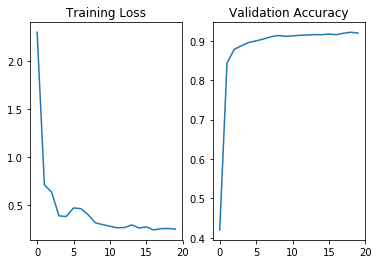

In [11]:
# Learning & Evaluation

params  = model(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels)

### (b)	Set up an MLP with a single hidden layer (you can choose the number of hidden nodes) and learn it on MNIST using stochastic gradient descent.

In [12]:
# Modeling Definition
def model_single_layer(X_train, Y_train, X_test, Y_test, nodes, learning_rate = 0.001, iterations=2000):
    
    loss = []
    validation_acc = []
    
    tf.reset_default_graph()   
    
    #create placeholder
    X = tf.placeholder(tf.float32, [784, None], name="X")
    Y = tf.placeholder(tf.float32, [10, None], name="Y")
    
    #create variable
    #20 nodes in the hidden layer
    W1 = tf.get_variable("W1", [nodes, 784], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [nodes, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10, nodes], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [10, 1], initializer = tf.zeros_initializer())
    
    params = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    #forward
    Z = tf.add(tf.matmul(W1, X), b1)
    Z = tf.nn.relu(Z)
    A = tf.add(tf.matmul(W2, Z), b2)
    
    #loss
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(A), labels=tf.transpose(Y)))
    
    #back
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(A), tf.argmax(Y))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        # print('hahaha')
        for i in range(iterations):
            minibatch = mnist.train.next_batch(64)
            (minibatch_X, minibatch_Y) = minibatch
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})

            # Print the cost every epoch
            if i % 100 == 0:
                loss.append(minibatch_cost)
                #validation
                validation_batch = (mnist.validation.images, mnist.validation.labels)
                validation_acc.append(accuracy.eval({X: validation_batch[0].T, Y: validation_batch[1].T}))
                print ("after iteration {}: training loss: {} ; validation accuracy: {}".format(\
                        i, minibatch_cost, validation_acc[-1]))
    
        plt.subplot(1,2,1)
        plt.title('Training Loss')
        plt.plot(loss)
        plt.subplot(1,2,2)
        plt.title('Validation Accuracy')
        plt.plot(validation_acc)
        

        print("Train Accuracy:", accuracy.eval({X: X_train.T, Y: Y_train.T}))
        print("Test Accuracy:", accuracy.eval({X: X_test.T, Y: Y_test.T}))
        
        params = sess.run(params)
        return params
      

In [13]:
# Learning &  Evaluation
params_single_layer  = model_single_layer(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, 20)

after iteration 0: training loss: 2.353983163833618 ; validation accuracy: 0.1103999987244606
after iteration 100: training loss: 0.5266005992889404 ; validation accuracy: 0.842199981212616
after iteration 200: training loss: 0.677497386932373 ; validation accuracy: 0.8822000026702881
after iteration 300: training loss: 0.26841843128204346 ; validation accuracy: 0.8978000283241272
after iteration 400: training loss: 0.3515270948410034 ; validation accuracy: 0.9038000106811523
after iteration 500: training loss: 0.26875561475753784 ; validation accuracy: 0.9156000018119812
after iteration 600: training loss: 0.32148489356040955 ; validation accuracy: 0.9190000295639038
after iteration 700: training loss: 0.25390908122062683 ; validation accuracy: 0.9192000031471252
after iteration 800: training loss: 0.16885055601596832 ; validation accuracy: 0.921999990940094
after iteration 900: training loss: 0.140997514128685 ; validation accuracy: 0.9264000058174133
after iteration 1000: training l

after iteration 0: training loss: 2.396806478500366 ; validation accuracy: 0.13359999656677246
after iteration 100: training loss: 0.6246168613433838 ; validation accuracy: 0.8880000114440918
after iteration 200: training loss: 0.566124677658081 ; validation accuracy: 0.9056000113487244
after iteration 300: training loss: 0.2226826250553131 ; validation accuracy: 0.9156000018119812
after iteration 400: training loss: 0.25305992364883423 ; validation accuracy: 0.9233999848365784
after iteration 500: training loss: 0.26388728618621826 ; validation accuracy: 0.9315999746322632
after iteration 600: training loss: 0.12048496305942535 ; validation accuracy: 0.9336000084877014
after iteration 700: training loss: 0.26874569058418274 ; validation accuracy: 0.9337999820709229
after iteration 800: training loss: 0.19439776241779327 ; validation accuracy: 0.9401999711990356
after iteration 900: training loss: 0.15922026336193085 ; validation accuracy: 0.9405999779701233
after iteration 1000: train

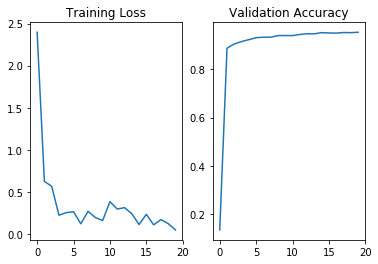

In [14]:
# Learning &  Evaluation with 50 hidden nodes
params_single_layer  = model_single_layer(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, 50)

In [15]:
# Learning &  Evaluation with 100 hidden nodes
params_single_layer  = model_single_layer(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, 100)

after iteration 0: training loss: 2.430537223815918 ; validation accuracy: 0.1348000019788742
after iteration 100: training loss: 0.4106547236442566 ; validation accuracy: 0.8938000202178955
after iteration 200: training loss: 0.250139057636261 ; validation accuracy: 0.9156000018119812
after iteration 300: training loss: 0.36932098865509033 ; validation accuracy: 0.9236000180244446
after iteration 400: training loss: 0.2679746150970459 ; validation accuracy: 0.9323999881744385
after iteration 500: training loss: 0.21797022223472595 ; validation accuracy: 0.9381999969482422
after iteration 600: training loss: 0.12878742814064026 ; validation accuracy: 0.9423999786376953
after iteration 700: training loss: 0.20240893959999084 ; validation accuracy: 0.9408000111579895
after iteration 800: training loss: 0.28565871715545654 ; validation accuracy: 0.9467999935150146
after iteration 900: training loss: 0.33017539978027344 ; validation accuracy: 0.949999988079071
after iteration 1000: trainin

after iteration 0: training loss: 2.4263274669647217 ; validation accuracy: 0.2563999891281128
after iteration 100: training loss: 0.2609104812145233 ; validation accuracy: 0.9120000004768372
after iteration 200: training loss: 0.1457446813583374 ; validation accuracy: 0.9296000003814697
after iteration 300: training loss: 0.16129255294799805 ; validation accuracy: 0.9476000070571899
after iteration 400: training loss: 0.1504567265510559 ; validation accuracy: 0.9502000212669373
after iteration 500: training loss: 0.3624509572982788 ; validation accuracy: 0.9588000178337097
after iteration 600: training loss: 0.3061683773994446 ; validation accuracy: 0.965399980545044
after iteration 700: training loss: 0.1534571647644043 ; validation accuracy: 0.9656000137329102
after iteration 800: training loss: 0.10003714263439178 ; validation accuracy: 0.9660000205039978
after iteration 900: training loss: 0.17532199621200562 ; validation accuracy: 0.9657999873161316
after iteration 1000: training

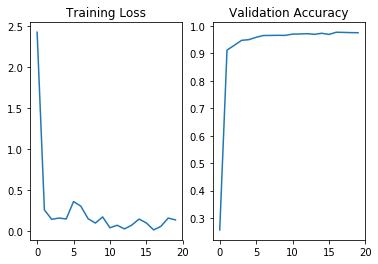

In [19]:
# Learning &  Evaluation with 500 hidden nodes
params_single_layer  = model_single_layer(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, 500)

### (c)	Set up an MLP with two hidden layers (i.e. lecture 2, slide 55)

In [16]:
# Modeling Definition
def model_two_layers(X_train, Y_train, X_test, Y_test,nodes1, nodes2, learning_rate = 0.001, iterations=2000):
    
    loss = []
    validation_acc = []
    
    tf.reset_default_graph()   
    
    #create placeholder
    X = tf.placeholder(tf.float32, [784, None], name="X")
    Y = tf.placeholder(tf.float32, [10, None], name="Y")
    
    #create variable
    #50 nodes in the first hidden layer
    #20 nodes in the second hidden layer
    W1 = tf.get_variable("W1", [nodes1, 784], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [nodes1, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [nodes2, nodes1], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [nodes2, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [10, nodes2], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [10, 1], initializer = tf.zeros_initializer())
    
    params = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
        'W3':W3,
        'b3':b3
    }
    #forward
    Z = tf.add(tf.matmul(W1, X), b1)
    Z = tf.nn.relu(Z)
    Z = tf.add(tf.matmul(W2, Z), b2)
    Z = tf.nn.relu(Z)
    A = tf.add(tf.matmul(W3, Z), b3)
    
    
    #loss
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(A), labels=tf.transpose(Y)))
    
    #back
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(A), tf.argmax(Y))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        # print('hahaha')
        for i in range(iterations):
            minibatch = mnist.train.next_batch(64)
            (minibatch_X, minibatch_Y) = minibatch
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})

            # report every 100 iterations
            if i % 100 == 0:
                loss.append(minibatch_cost)
                #validation
                validation_batch = (mnist.validation.images, mnist.validation.labels)
                validation_acc.append(accuracy.eval({X: validation_batch[0].T, Y: validation_batch[1].T}))
                print ("after iteration {}: training loss: {} ; validation accuracy: {}".format(\
                        i, minibatch_cost, validation_acc[-1]))
    
        plt.subplot(1,2,1)
        plt.title('Training Loss')
        plt.plot(loss)
        plt.subplot(1,2,2)
        plt.title('Validation Accuracy')
        plt.plot(validation_acc)
    
        
        print("Train Accuracy:", accuracy.eval({X: X_train.T, Y: Y_train.T}))
        print("Test Accuracy:", accuracy.eval({X: X_test.T, Y: Y_test.T}))
        
        params = sess.run(params)
        return params

after iteration 0: training loss: 2.3806216716766357 ; validation accuracy: 0.08699999749660492
after iteration 100: training loss: 0.7088088989257812 ; validation accuracy: 0.871999979019165
after iteration 200: training loss: 0.3111751675605774 ; validation accuracy: 0.9128000140190125
after iteration 300: training loss: 0.1495031714439392 ; validation accuracy: 0.9196000099182129
after iteration 400: training loss: 0.5267429947853088 ; validation accuracy: 0.9297999739646912
after iteration 500: training loss: 0.22114326059818268 ; validation accuracy: 0.9296000003814697
after iteration 600: training loss: 0.2580195665359497 ; validation accuracy: 0.9377999901771545
after iteration 700: training loss: 0.29526856541633606 ; validation accuracy: 0.9348000288009644
after iteration 800: training loss: 0.33099254965782166 ; validation accuracy: 0.9416000247001648
after iteration 900: training loss: 0.18410137295722961 ; validation accuracy: 0.9459999799728394
after iteration 1000: traini

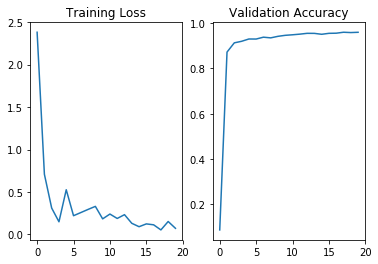

In [17]:
# Learning &  Evaluation
params_two_layers = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, 50, 20)

after iteration 0: training loss: 2.3395297527313232 ; validation accuracy: 0.1762000024318695
after iteration 100: training loss: 0.32452157139778137 ; validation accuracy: 0.8934000134468079
after iteration 200: training loss: 0.5557155609130859 ; validation accuracy: 0.9259999990463257
after iteration 300: training loss: 0.15221861004829407 ; validation accuracy: 0.9294000267982483
after iteration 400: training loss: 0.22921577095985413 ; validation accuracy: 0.9380000233650208
after iteration 500: training loss: 0.24193964898586273 ; validation accuracy: 0.9417999982833862
after iteration 600: training loss: 0.16931353509426117 ; validation accuracy: 0.9508000016212463
after iteration 700: training loss: 0.2590988874435425 ; validation accuracy: 0.9526000022888184
after iteration 800: training loss: 0.22231948375701904 ; validation accuracy: 0.9539999961853027
after iteration 900: training loss: 0.1009310930967331 ; validation accuracy: 0.9567999839782715
after iteration 1000: trai

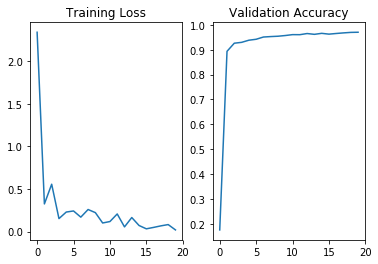

In [18]:
# Learning &  Evaluation
params_two_layers = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, 100, 50)

## Problem 4: Performance Comparison (20 points)

Note: all perfermance numbers (training loss, training/validation/test accuracy) and figures could be found in above problems.

### (a)	Did your implementations and Tensorflow’s implementations from problems 2 and 3 perform the same?

They are not exactly the same, but have comparable performances. My implementation of LR has a training accuracy, validation accuracy and test accuracy of ~89.1%, ~89.8% and ~89.7% after 5000 iterations, respectively. Tensorflow's implementation of LR has a training accuracy, validation accuracy and test accuracy of ~91.6%, ~91.9% and ~91.7% after 2000 iterations.

Tensorflow's implementation is slightly better. The reason might be: my implementation use the standard SGD with 64 random selected data points, while I choose ADAM optimizer (default parameters setting, 64 random selected data points) in Tensorflow. Compared to standard SGD, ADAM could converge to the optimal solution more quickly in practice.

### (b)	What is the validation accuracy from the multi-class logistic regression?

After 2000 iterations of training, the validation accuracy is about 92%.

### (c)	What is the validation accuracy from the multi-class MLP with a single hidden layer?  If you change the number of nodes in the hidden layer, how susceptible is the hold out performance?

|    |      Validation Accuracy      | Training Accuracy | Test Accuracy |
|----------|:-------------:|:--:|:--:|
| first layer: 20 nodes | 94.1%  | 94.4%| 93.8%|
| first layer: 50 nodes|   95.4%  | 95.5% | 95.3%|
| first layer: 100 nodes|   96.1%  |  97%| 96.3%|
| first layer: 500 nodes|   97.5%  |  98.6%| 97%|

The above table summarize how the performance numbers (after 2000 iterations) would change as we increase the number of nodes in the hidden layer. Generally speaking, a large number of nodes in the layer could leads to a better hold-out performance. However, there is a diminishing return. In other words, if you continue to increase the number of nodes in the single hidden layer, its influence on the performance number would be subtle, i.e., you don't expect to see test accuracy continue to improve too much.

### (d)	What is the validation accuracy from the multi-class MLP with two hidden layer?  If you change the number of nodes in the hidden layers, how susceptible is the hold out performance?

|    |      Validation Accuracy      | Training Accuracy | Test Accuracy |
|----------|:-------------:|:--:|:--:|
| first layer: 50 nodes, second layer: 20 nodes |  95.9% | 96.1%| 95.6% |
| first layer: 100 nodes, second layer: 50 nodes |   96.8%  | 97.4%| 97.0%|

The above table summarize how the performance numbers (after 2000 iterations) would change as we increase the number of nodes in each hidden layer. The conclusion is similar to problem(c). Increase number of nodes in hidden layers could increase the performance, but quickly it will reach the ceiling of accuracy around 96%-97%.


### (e)	Do you match my reported accuracies (lecture 2, slide 58)?

Yes, the experimental results are very close to the reported accuracies in class. The best result from MLP with no hidden layer is 91.7%. The best result from MLP with one hidden layer is 97%.